# 로지스틱 회귀

x데이터 형태: (10, 1)
y데이터 형태: (10,)
회귀계수(기울기): [0.02]
절편: -0.343


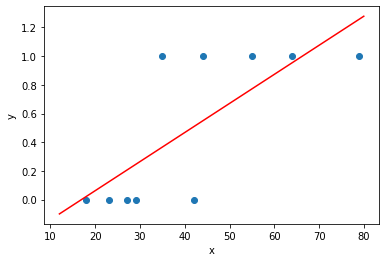

In [ ]:
# 데이터 입력하기 
import numpy as np
import matplotlib.pyplot as plt

x = np.array([23, 27, 44, 29, 35, 79, 64, 55, 18, 42])
y = np.array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0])
x = x.reshape(-1, 1)

print("x데이터 형태:", x.shape)
print("y데이터 형태:", y.shape)


# 0/1 범주형 데이터에 선형회귀모형 적용
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

print("회귀계수(기울기):", np.round(model.coef_, 3))
print("절편:", np.round(model.intercept_, 3))

x_new = np.linspace(12, 80, 100)
y_new = model.predict(x_new[:, np.newaxis])
plt.scatter(x, y)
plt.plot(x_new, y_new, 'r')
plt.xlabel("x")
plt.ylabel("y");

회귀계수(기울기): [[0.209]]
절편: [-8.035]
x: [23 27 44 29 35 79 64 55 18 42]
y:       [0 0 1 0 1 1 1 1 0 0]
y예측값: [0 0 1 0 0 1 1 1 0 1]
Accuracy: 0.800
x=50일 때 P(y=0): [0.08075962]
x=50일 때 P(y=1): [0.91924038]
x=50일 때 예측 y값: [1]


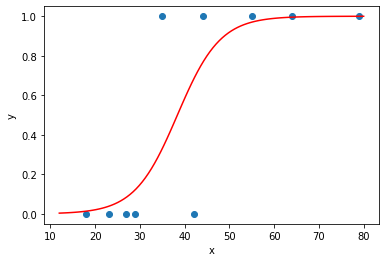

In [ ]:
# 0/1 범주형 데이터에 로지스틱회귀모형 적용
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x, y)                          #경사하강법으로 최소값 찾아감
print("회귀계수(기울기):", np.round(model.coef_, 3))
print("절편:", np.round(model.intercept_, 3))


y_pred = model.predict(x)
print("x:", x.reshape(-1))
print("y:      ", y)
print("y예측값:", y_pred)


x_new = np.linspace(12, 80, 100)         # 12~80 까지 x      
y_new = model.predict_proba(x_new[:, np.newaxis])[:,1]
plt.scatter(x, y)
plt.plot(x_new, y_new, 'r')
plt.xlabel("x")
plt.ylabel("y");


model_accuracy = accuracy_score(y, y_pred)   
print("Accuracy: %.3f" % model_accuracy)    # 모형 성능평가


print("x=50일 때 P(y=0):", model.predict_proba([[50]])[:,0])  #확률값
print("x=50일 때 P(y=1):", model.predict_proba([[50]])[:,1])  #확률값
print("x=50일 때 예측 y값:", model.predict([[50]]))


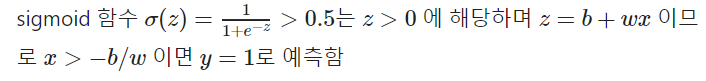

In [ ]:
# 20p 연습문제
# y=1로 예측하는 x의 범위는 무엇인가?
-model.intercept_ / model.coef_     # 38.38보다 크면 예측함

array([[38.38233666]])

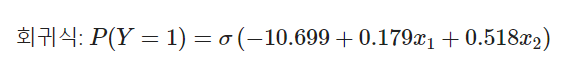

In [ ]:
# 21p 연습문제
# 회귀식, 정확도, 확률

x1 = np.array([55, 67, 31, 22, 44, 24, 79, 55, 49, 32])
x2 = np.array([0, 7, 13, 6, 3, 0, 1, 7, 2, 9])
x = np.column_stack((x1, x2))
y = np.array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

print("x데이터 형태:", x.shape)
print("y데이터 형태:", y.shape)

model = LogisticRegression()
model.fit(x, y)

print("회귀계수(기울기):", np.round(model.coef_, 3))
print("절편:", np.round(model.intercept_, 3))

y_pred = model.predict(x)      # 로지스틱 회귀모형이 예측하는  y값
print("y:      ", y)
print("y예측값:", y_pred)

model_accuracy = accuracy_score(y, y_pred)
print("Accuracy: %.3f" % model_accuracy)

print("x1=40, x2=5일 때 P(y=0):", model.predict_proba([[40,5]])[:,0])
print("x1=40, x2=5일 때 P(y=1):", model.predict_proba([[40,5]])[:,1])
print("x1=40, x2=5일 때 예측 y값:", model.predict([[40,5]]))

x데이터 형태: (10, 2)
y데이터 형태: (10,)
회귀계수(기울기): [[0.179 0.518]]
절편: [-10.699]
y:       [0 1 1 0 1 0 1 1 0 0]
y예측값: [0 1 1 0 0 0 1 1 0 0]
Accuracy: 0.900
x1=40, x2=5일 때 P(y=0): [0.72160108]
x1=40, x2=5일 때 P(y=1): [0.27839892]
x1=40, x2=5일 때 예측 y값: [0]


# 다항로지스틱회귀분석

In [1]:
# 다항로지스틱회귀분석  : 소프트맥스 함수
import numpy as np
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=0)
softmax([1,-1,2])

array([0.25949646, 0.03511903, 0.70538451])

In [18]:
# 30p 연습문제

x1 = 2.0
x2 = 3.0
z1 = 1 + (-2) * x1 + 1 * x2
z2 = -1 + 3 * x1 + (-1) * x2
z3 = 0 + (-2.5) * x1 + 2 * x2
z4 = 1.5 + 0 * x1 + (-0.5) * x2
scores = [z1, z2, z3, z4]

y_pred = softmax(scores)
print("점수들:", scores)
print("예측치:", y_pred)
print("손실함수:", -np.log(y_pred[4-1]))    # index 0부터 시작하기 때문에 1 빼기

점수들: [0.0, 2.0, 1.0, 0.0]
예측치: [0.08259454 0.61029569 0.22451524 0.08259454]
손실함수: 2.4938117090722387


In [4]:
#소프트맥스 변환
import numpy as np
def softmax(z):
   return np.exp(z) /np.sum(np.exp(z), axis = 0)
print(softmax([0,2,1,0]))

[0.08259454 0.61029569 0.22451524 0.08259454]


In [6]:
import numpy as np
np.exp(2) / (np.exp(0) +np.exp(2) + np.exp(1) + np.exp(0))

0.6102956854136232

In [7]:
-np.log(np.exp(0) / (np.exp(0) +np.exp(2) + np.exp(1) + np.exp(0)))

2.4938117090722387

2번째에 속할 확률이 큼
* 위 확률의 합은 1
* 두번째가 0.61로 가장 크기 때문에 x가 2, 3인 입력데이터는 두번째 범주에 속할 경우가 가장 크다.

* 4번째에 속활 확률이 0.08이었음. 그래서 2.49 (손실함수 값) : 굉장히 큰 값임 
* 그 범주에 해당하는 예측값을 넣어주면 알 수 잇음. 손실함수는 오차라고 볼 수 있음.
* 파라미터 값은 학습:비용함수로 이용해 추정함. 비용함수 : 손실함수의 평균  => 오차를 가장 작게 만드는 방법으로

입력변수의 개수만큼 있어야 파라미터 개수가 있어야 함.

범주가 2개일 때  y가 1일 확률만 모델링 => b가 1개만 있었음 (통계에서)

<행렬로 표현할 필요한 이유>
* 1) c는 범주 수
* 2) nk  입력변수 개수
* 3) m : 관측치 개수

In [9]:
# 붓꽃의 품종 분류
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

In [10]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['Target'] = iris['target']    #target 0,1,2 범주
df

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
X_data = df.loc[:, 'sepal_length':'petal_width']
y_data = df.loc[:, 'Target']

# 훈련데이터 (8) 시험데이터 (2)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.2, shuffle=True, random_state=33)

print("훈련데이터 x와 y의 차원", X_train.shape, y_train.shape)
print("시험데이터 x와 y의 차원", X_test.shape, y_test.shape)


# 다항로지스틱회귀모형 적용
model = LogisticRegression()
model.fit(X_train, y_train)

print("절편값:", model.intercept_)
print("회귀계수값:")
print(model.coef_)

훈련데이터 x와 y의 차원 (120, 4) (120,)
시험데이터 x와 y의 차원 (30, 4) (30,)
절편값: [  9.12414865   2.52010921 -11.64425786]
회귀계수값:
[[-0.39217404  0.89114854 -2.35966853 -0.98920695]
 [ 0.43203459 -0.43230601 -0.08713213 -0.8902483 ]
 [-0.03986055 -0.45884253  2.44680066  1.87945525]]


In [14]:
# 시험데이터(X_test)의 정확도

y_test_pred = model.predict(X_test)   # Y햇 값을 예측함
print("시험데이터 실제값: ", np.array(y_test))
print("시험데이터 예측값: ", y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

print("시험데이터 정확도: %.3f" % accuracy)

시험데이터 실제값:  [1 1 0 1 2 2 0 0 2 2 2 0 2 1 2 1 2 0 1 2 0 0 2 0 2 2 1 1 2 2]
시험데이터 예측값:  [1 1 0 1 2 2 0 0 2 2 2 0 2 1 2 1 2 0 1 2 0 0 2 0 1 1 1 1 2 2]
시험데이터 정확도: 0.933


In [15]:
y_test_prob = model.predict_proba(X_test)   
np.round(y_test_prob[0:5,:],3)

array([[0.018, 0.919, 0.063],
       [0.006, 0.91 , 0.084],
       [0.965, 0.035, 0.   ],
       [0.003, 0.815, 0.183],
       [0.   , 0.278, 0.722]])

* 첫번재 시험데이터에 대한 y값 예측의 확률 : [[0.018, 0.919, 0.063] 
* => 첫번째 행에 잇는 값의  y가 첫번째 범주(y=0)에 속할 확률 0.018

In [19]:
# p43 연습문제 : 훈련데이터의 정확도

y_train_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("훈련데이터 정확도: %.3f" % accuracy)

훈련데이터 정확도: 0.967
